# auto-generate graph from PSML csv header

Dataset: `Minute-level PMU Measurements` is based on the PSS/E 23-bus system.

Paper: Zheng, X., Xu, N., Trinh, L. et al. A multi-scale time-series dataset with benchmark for machine learning in decarbonized energy grids. *Sci Data 9, 359 (2022)*. https://doi.org/10.1038/s41597-022-01455-7

PSS/E 23-bus diagram (fig. 3 in the paper):
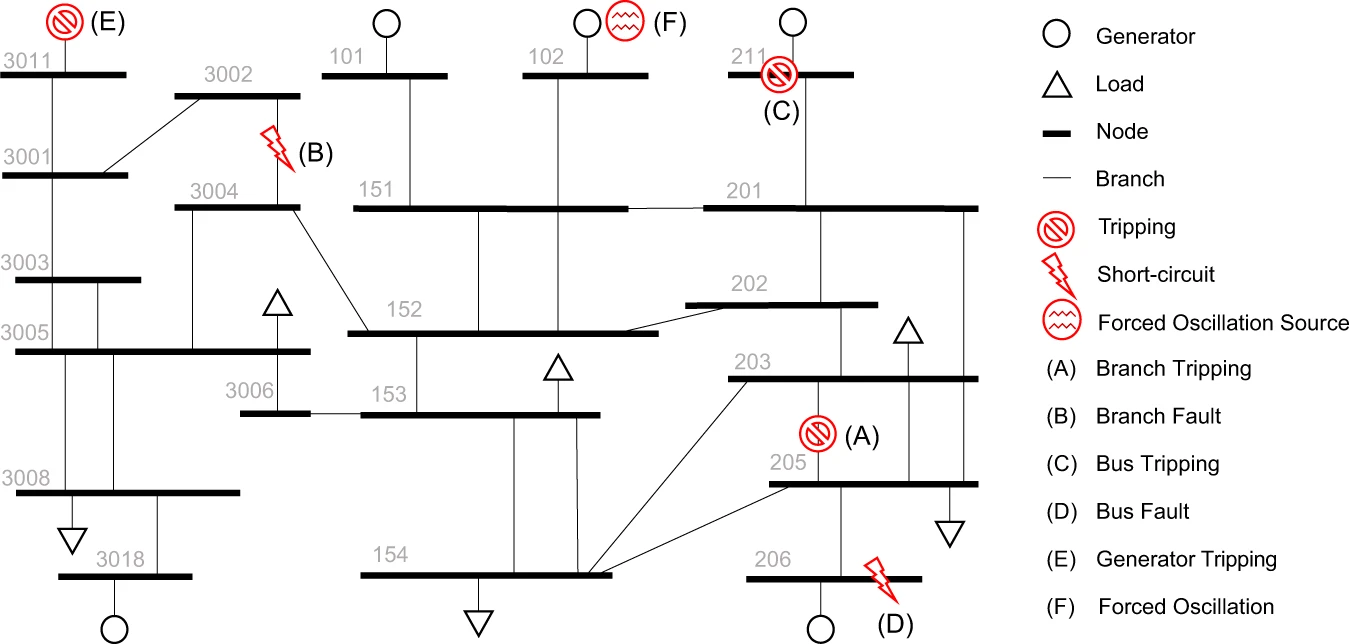

In [3]:
import re
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
h = 'time, Vm_101, Vm_102, Vm_151, Vm_152, Vm_153, Vm_154, Vm_201, Vm_202, Vm_203, Vm_204, Vm_205, Vm_206, Vm_211, Vm_3001, Vm_3002, Vm_3003, Vm_3004, Vm_3005, Vm_3006, Vm_3007, Vm_3008, Vm_3011, Vm_3018, Va_101, Va_102, Va_151, Va_152, Va_153, Va_154, Va_201, Va_202, Va_203, Va_204, Va_205, Va_206, Va_211, Va_3001, Va_3002, Va_3003, Va_3004, Va_3005, Va_3006, Va_3007, Va_3008, Va_3011, Va_3018, P_0_2_1 , P_1_2_1 , P_2_3_1 , P_2_3_2 , P_2_6_1 , P_3_4_1 , P_3_7_1 , P_3_16_1 , P_4_5_1 , P_4_5_2 , P_4_18_1 , P_5_8_1 , P_5_10_1 , P_5_20_1 , P_6_7_1 , P_6_9_1 , P_6_12_1 , P_7_8_1 , P_8_10_1 , P_8_10_2 , P_9_10_1 , P_10_11_1 , P_13_14_1 , P_13_15_1 , P_13_21_1 , P_14_16_1 , P_15_17_1 , P_15_17_2 , P_16_17_1 , P_17_18_1 , P_17_19_1 , P_17_20_1 , P_19_20_1 , P_20_22_1 , Q_0_2_1 , Q_1_2_1 , Q_2_3_1 , Q_2_3_2 , Q_2_6_1 , Q_3_4_1 , Q_3_7_1 , Q_3_16_1 , Q_4_5_1 , Q_4_5_2 , Q_4_18_1 , Q_5_8_1 , Q_5_10_1 , Q_5_20_1 , Q_6_7_1 , Q_6_9_1 , Q_6_12_1 , Q_7_8_1 , Q_8_10_1 , Q_8_10_2 , Q_9_10_1 , Q_10_11_1 , Q_13_14_1 , Q_13_15_1 , Q_13_21_1 , Q_14_16_1 , Q_15_17_1 , Q_15_17_2 , Q_16_17_1 , Q_17_18_1 , Q_17_19_1 , Q_17_20_1 , Q_19_20_1 , Q_20_22_1 ,'
h_n = 'Vm_101, Vm_102, Vm_151, Vm_152, Vm_153, Vm_154, Vm_201, Vm_202, Vm_203, Vm_204, Vm_205, Vm_206, Vm_211, Vm_3001, Vm_3002, Vm_3003, Vm_3004, Vm_3005, Vm_3006, Vm_3007, Vm_3008, Vm_3011, Vm_3018'
h_e = 'P_0_2_1 , P_1_2_1 , P_2_3_1 , P_2_3_2 , P_2_6_1 , P_3_4_1 , P_3_7_1 , P_3_16_1 , P_4_5_1 , P_4_5_2 , P_4_18_1 , P_5_8_1 , P_5_10_1 , P_5_20_1 , P_6_7_1 , P_6_9_1 , P_6_12_1 , P_7_8_1 , P_8_10_1 , P_8_10_2 , P_9_10_1 , P_10_11_1 , P_13_14_1 , P_13_15_1 , P_13_21_1 , P_14_16_1 , P_15_17_1 , P_15_17_2 , P_16_17_1 , P_17_18_1 , P_17_19_1 , P_17_20_1 , P_19_20_1 , P_20_22_1'

In [3]:
node_names = [ n.split('_')[1] for n in re.split('\s*,\s*', h_n)]
print('num of buses: ', len(node_names))
for i, nn in enumerate(node_names):
    print(i, nn)

num of buses:  23
0 101
1 102
2 151
3 152
4 153
5 154
6 201
7 202
8 203
9 204
10 205
11 206
12 211
13 3001
14 3002
15 3003
16 3004
17 3005
18 3006
19 3007
20 3008
21 3011
22 3018


Determin the coords of each bus using this diagram:

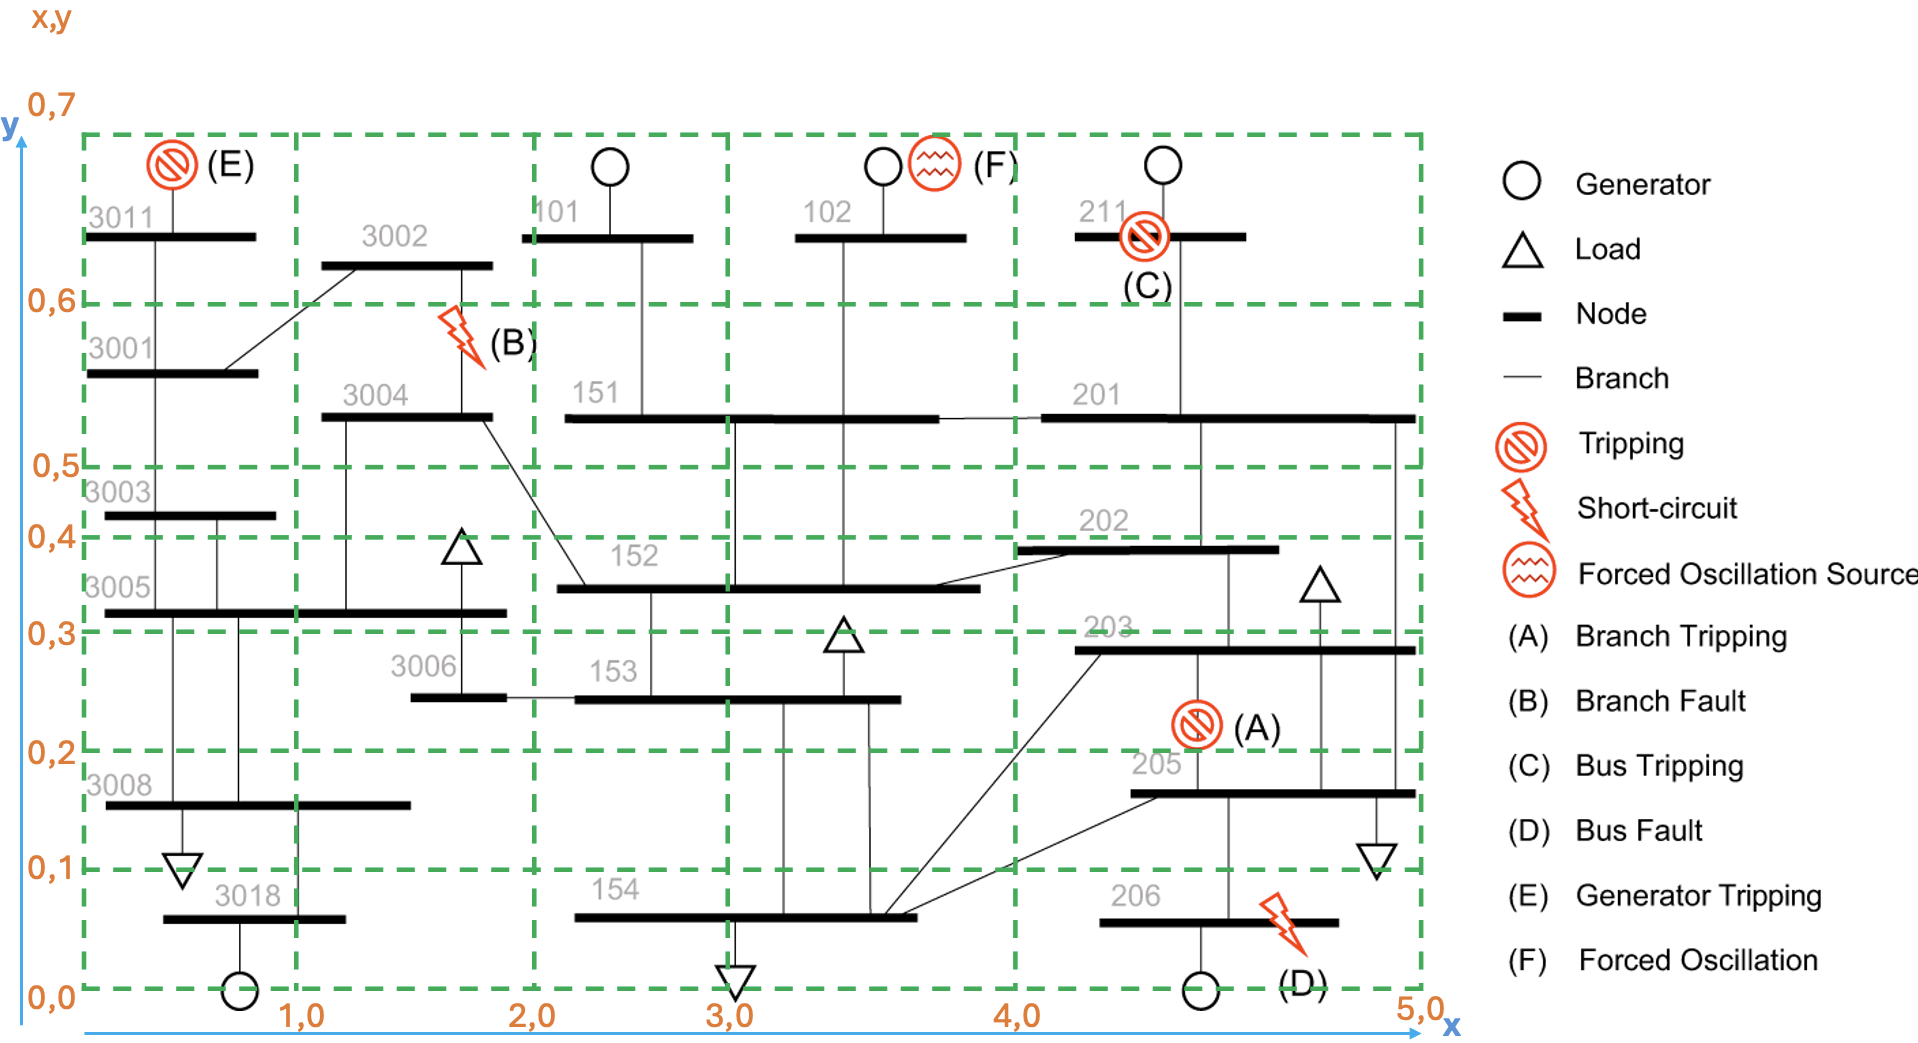

In [4]:
coords = [
    (2.5, 6.5), # 101
    (3.5, 6.5), # 102
    (3.0, 5.5), # 151
    (3.0, 3.5), # 152
    (3.0, 2.5), # 153
    (3.0, 0.5), # 154
    (4.5, 5.5), # 201
    (4.5, 3.5), # 202
    (4.5, 2.5), # 203
    (5.0, 2.0), # 204, not on diagram
    (4.5, 1.5), # 205
    (4.5, 0.5), # 206
    (4.5, 6.5), # 211
    (0.5, 5.5), # 3001
    (1.5, 6.5), # 3002
    (0.5, 4.5), # 3003
    (1.5, 5.5), # 3004
    (1.0, 3.5), # 3005
    (1.5, 2.5), # 3006
    (1.5, 2.0), # 3007, not on diagram
    (1.0, 1.5), # 3008
    (0.5, 6.5), # 3011
    (1.0, 0.5), # 3018
]

In [5]:
edge_tokens = re.split('\s*,\s*', h_e)
from_nodes = [ int(n.split('_')[1]) for n in edge_tokens]
to_nodes = [ int(n.split('_')[2]) for n in edge_tokens]
branch_names = [ int(n.split('_')[3]) for n in edge_tokens]

In [6]:
print('num of edges: ', len(from_nodes))
list(zip(from_nodes, to_nodes, branch_names))

num of edges:  34


[(0, 2, 1),
 (1, 2, 1),
 (2, 3, 1),
 (2, 3, 2),
 (2, 6, 1),
 (3, 4, 1),
 (3, 7, 1),
 (3, 16, 1),
 (4, 5, 1),
 (4, 5, 2),
 (4, 18, 1),
 (5, 8, 1),
 (5, 10, 1),
 (5, 20, 1),
 (6, 7, 1),
 (6, 9, 1),
 (6, 12, 1),
 (7, 8, 1),
 (8, 10, 1),
 (8, 10, 2),
 (9, 10, 1),
 (10, 11, 1),
 (13, 14, 1),
 (13, 15, 1),
 (13, 21, 1),
 (14, 16, 1),
 (15, 17, 1),
 (15, 17, 2),
 (16, 17, 1),
 (17, 18, 1),
 (17, 19, 1),
 (17, 20, 1),
 (19, 20, 1),
 (20, 22, 1)]

In [7]:
for nfrom, nto, branch in zip(from_nodes, to_nodes, branch_names):
    print(node_names[nfrom], '->', node_names[nto], 'b:', branch)

101 -> 151 b: 1
102 -> 151 b: 1
151 -> 152 b: 1
151 -> 152 b: 2
151 -> 201 b: 1
152 -> 153 b: 1
152 -> 202 b: 1
152 -> 3004 b: 1
153 -> 154 b: 1
153 -> 154 b: 2
153 -> 3006 b: 1
154 -> 203 b: 1
154 -> 205 b: 1
154 -> 3008 b: 1
201 -> 202 b: 1
201 -> 204 b: 1
201 -> 211 b: 1
202 -> 203 b: 1
203 -> 205 b: 1
203 -> 205 b: 2
204 -> 205 b: 1
205 -> 206 b: 1
3001 -> 3002 b: 1
3001 -> 3003 b: 1
3001 -> 3011 b: 1
3002 -> 3004 b: 1
3003 -> 3005 b: 1
3003 -> 3005 b: 2
3004 -> 3005 b: 1
3005 -> 3006 b: 1
3005 -> 3007 b: 1
3005 -> 3008 b: 1
3007 -> 3008 b: 1
3008 -> 3018 b: 1


In [8]:
list_edge_attrs = [ {'branch': branch} for branch in branch_names]

In [9]:

g = nx.MultiDiGraph()
g.add_edges_from(zip(from_nodes, to_nodes, list_edge_attrs))
adj = nx.adjacency_matrix(g)
print(adj.todense())


[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 

In [10]:

# set node attributes: bus id and coordinates
for i, nn in enumerate(node_names):
    g.nodes[i]['bus'] = nn
    g.nodes[i]['pos'] = coords[i]

In [20]:
def draw_graph(g, print_bus_label=True):
    positions = {n: attr['pos'] for n, attr in g.nodes(data=True)}
    
    node_size = 800
    node_shape = 's'

    nx.draw_networkx_nodes(g, positions, 
                            node_size=node_size,
                            node_color='white', 
                            node_shape=node_shape, # reference: https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html#filled-markers
                            alpha=0.8,
                            linewidths=2,
                            edgecolors='k'
                           )

    if print_bus_label:
        node_labels = {n: attr['bus'] for n, attr in g.nodes(data=True)}
        nx.draw_networkx_labels(g, positions, labels = node_labels,
                                font_size = 10,
                                font_color='r'
                                )
    nx.draw_networkx_edges(g, positions, 
                           edge_color='b', 
                           arrows=True, 
                           arrowsize=20, 
                           connectionstyle='arc3,rad=0.1',
                           node_size=node_size,
                           node_shape=node_shape
                           )

    edge_labels = {(u, v): attr['branch'] for u, v, attr in g.edges(data=True)}
    nx.draw_networkx_edge_labels(g, positions, edge_labels=edge_labels,
                                font_size = 10,
                                font_color='b'
                                ) 

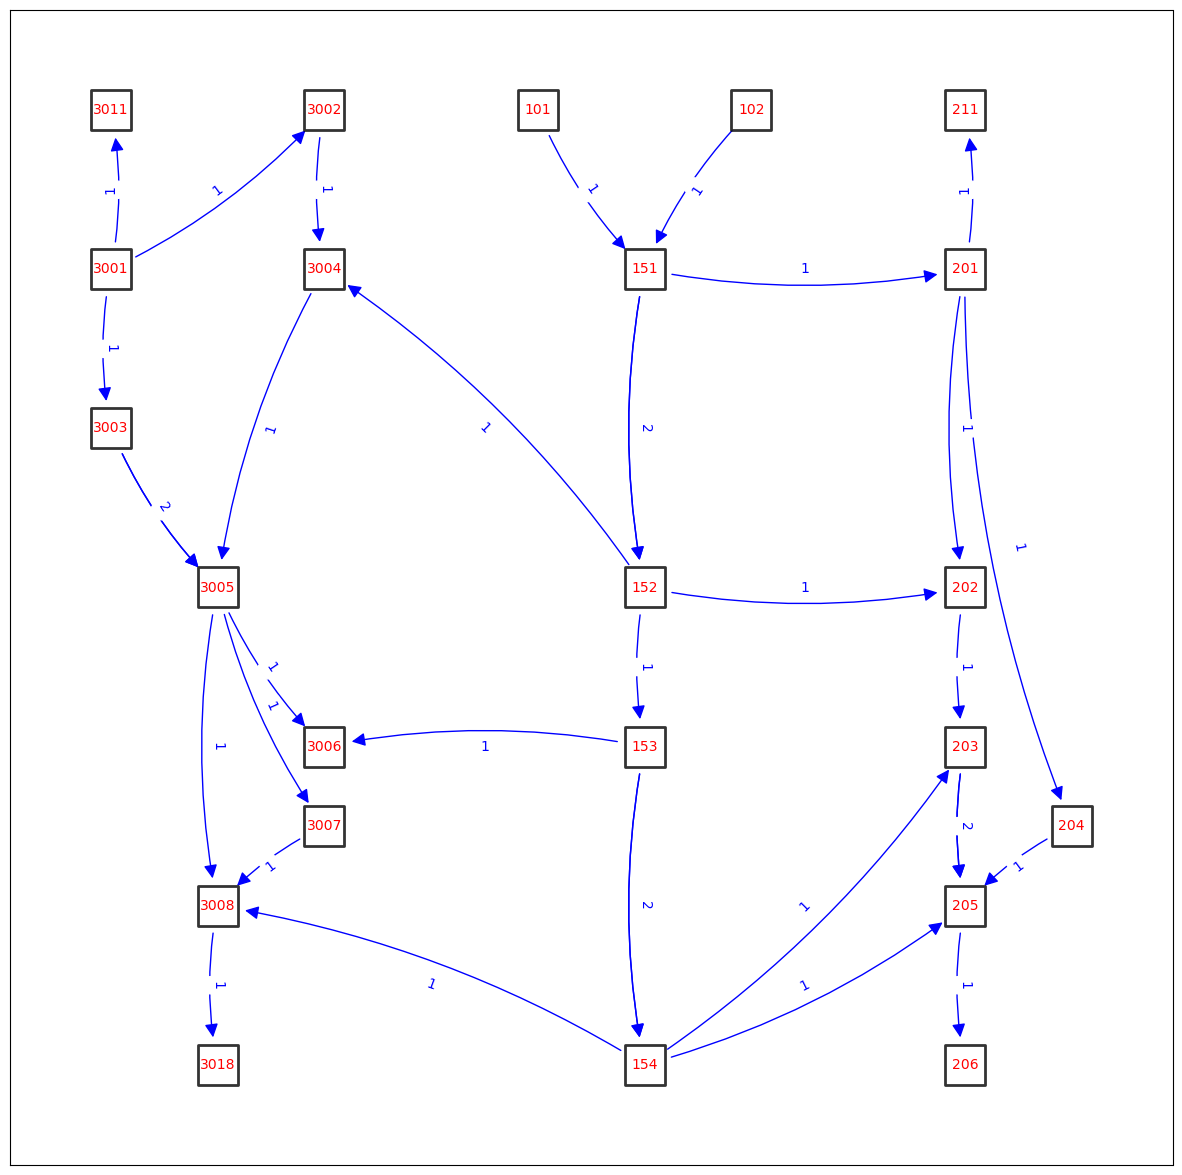

In [21]:
plt.figure(figsize=(15,15))
draw_graph(g)

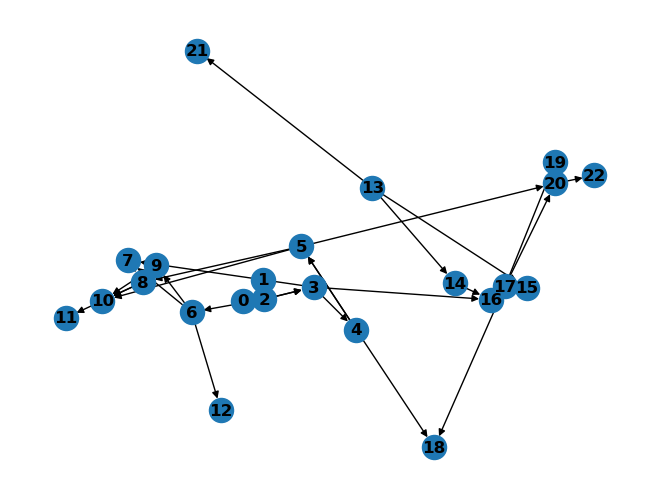

In [24]:
nx.draw(g, with_labels=True, font_weight='bold')

In [28]:
g.nodes(data=True)

NodeDataView({0: {'bus': '101', 'pos': (2.5, 6.5)}, 2: {'bus': '151', 'pos': (3.0, 5.5)}, 1: {'bus': '102', 'pos': (3.5, 6.5)}, 3: {'bus': '152', 'pos': (3.0, 3.5)}, 6: {'bus': '201', 'pos': (4.5, 5.5)}, 4: {'bus': '153', 'pos': (3.0, 2.5)}, 7: {'bus': '202', 'pos': (4.5, 3.5)}, 16: {'bus': '3004', 'pos': (1.5, 5.5)}, 5: {'bus': '154', 'pos': (3.0, 0.5)}, 18: {'bus': '3006', 'pos': (1.5, 2.5)}, 8: {'bus': '203', 'pos': (4.5, 2.5)}, 10: {'bus': '205', 'pos': (4.5, 1.5)}, 20: {'bus': '3008', 'pos': (1.0, 1.5)}, 9: {'bus': '204', 'pos': (4.5, 2.0)}, 12: {'bus': '211', 'pos': (4.5, 6.5)}, 11: {'bus': '206', 'pos': (4.5, 0.5)}, 13: {'bus': '3001', 'pos': (0.5, 5.5)}, 14: {'bus': '3002', 'pos': (1.5, 6.5)}, 15: {'bus': '3003', 'pos': (0.5, 4.5)}, 21: {'bus': '3011', 'pos': (0.5, 6.5)}, 17: {'bus': '3005', 'pos': (1.0, 3.5)}, 19: {'bus': '3007', 'pos': (1.5, 2.0)}, 22: {'bus': '3018', 'pos': (1.0, 0.5)}})

In [37]:
g.edges(data=True)

OutMultiEdgeDataView([(0, 2, {'branch': 1}), (2, 3, {'branch': 1}), (2, 3, {'branch': 2}), (2, 6, {'branch': 1}), (1, 2, {'branch': 1}), (3, 4, {'branch': 1}), (3, 7, {'branch': 1}), (3, 16, {'branch': 1}), (6, 7, {'branch': 1}), (6, 9, {'branch': 1}), (6, 12, {'branch': 1}), (4, 5, {'branch': 1}), (4, 5, {'branch': 2}), (4, 18, {'branch': 1}), (7, 8, {'branch': 1}), (16, 17, {'branch': 1}), (5, 8, {'branch': 1}), (5, 10, {'branch': 1}), (5, 20, {'branch': 1}), (8, 10, {'branch': 1}), (8, 10, {'branch': 2}), (10, 11, {'branch': 1}), (20, 22, {'branch': 1}), (9, 10, {'branch': 1}), (13, 14, {'branch': 1}), (13, 15, {'branch': 1}), (13, 21, {'branch': 1}), (14, 16, {'branch': 1}), (15, 17, {'branch': 1}), (15, 17, {'branch': 2}), (17, 18, {'branch': 1}), (17, 19, {'branch': 1}), (17, 20, {'branch': 1}), (19, 20, {'branch': 1})])

IEEE 13-bus feeder

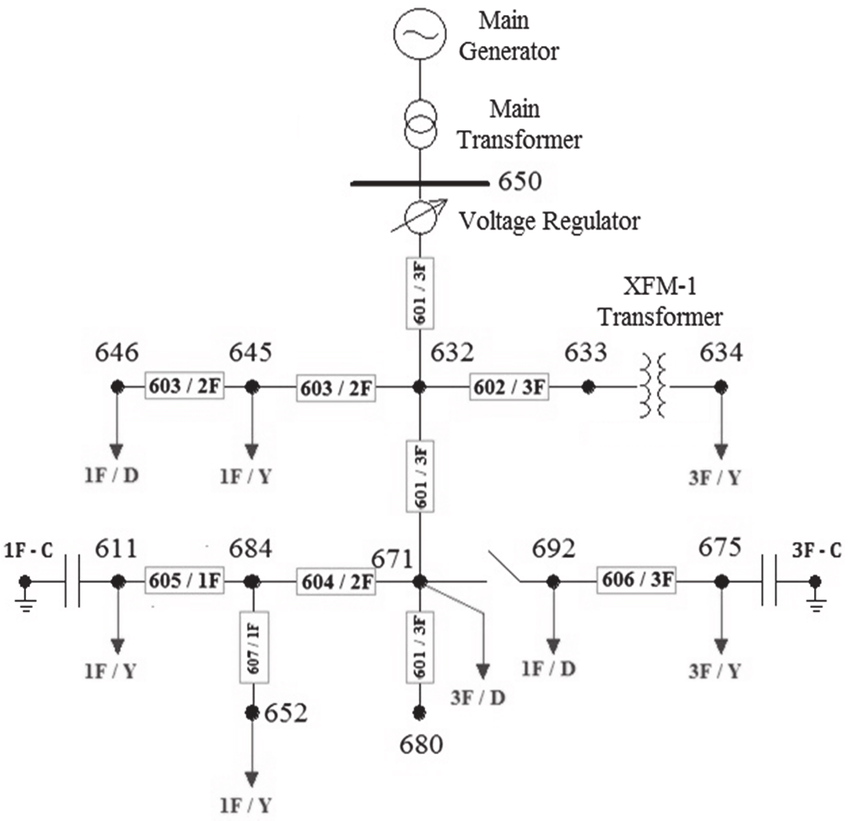

In PSML Millisecond PMU data, bus 650 was incorrectly labeled as bus 670.

# IEEE 39-bus system
[IEEE 39-bus diagram from UIUC](https://icseg.iti.illinois.edu/ieee-39-bus-system/)

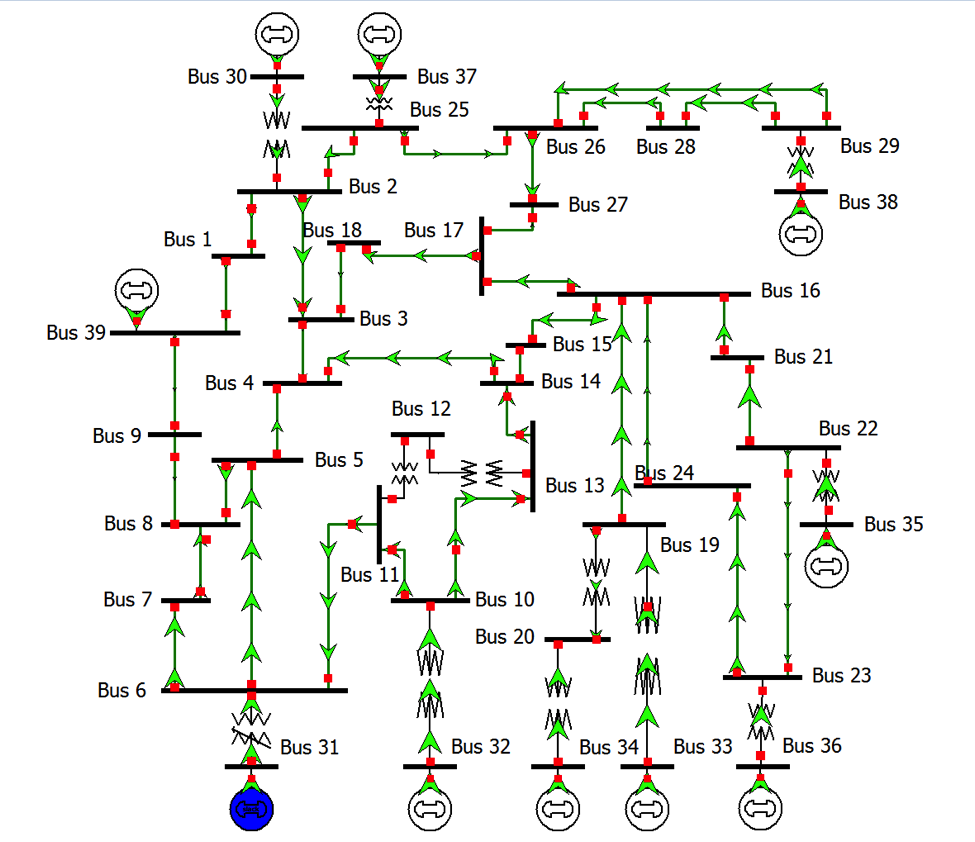

# Temporal resolution

In [2]:
import pandas as pd

In [27]:
time_index = pd.period_range(
    start='2024-02-29 00:00:00',
    freq='U',
    periods=1_000_005,
)

In [33]:
(time_index.to_timestamp().microsecond.values % 1000)[-10:]

array([995, 996, 997, 998, 999,   0,   1,   2,   3,   4], dtype=int32)

In [37]:
time_index.to_timestamp().microsecond.values[-10:]

array([999995, 999996, 999997, 999998, 999999,      0,      1,      2,
            3,      4], dtype=int32)

In [31]:
time_index.to_timestamp().microsecond.values.astype(float)[-10:]

array([9.99995e+05, 9.99996e+05, 9.99997e+05, 9.99998e+05, 9.99999e+05,
       0.00000e+00, 1.00000e+00, 2.00000e+00, 3.00000e+00, 4.00000e+00])

In [32]:
time_index.to_timestamp().microsecond.astype(float).values[-10:]

array([9.99995e+05, 9.99996e+05, 9.99997e+05, 9.99998e+05, 9.99999e+05,
       0.00000e+00, 1.00000e+00, 2.00000e+00, 3.00000e+00, 4.00000e+00])

In [24]:
time_index.second.astype(float)[:10]

Index([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], dtype='float64')

In [9]:
time_index.to_numpy()[:10]

array([Period('2024-02-29 00:00:00.000000', 'U'),
       Period('2024-02-29 00:00:00.000001', 'U'),
       Period('2024-02-29 00:00:00.000002', 'U'),
       Period('2024-02-29 00:00:00.000003', 'U'),
       Period('2024-02-29 00:00:00.000004', 'U'),
       Period('2024-02-29 00:00:00.000005', 'U'),
       Period('2024-02-29 00:00:00.000006', 'U'),
       Period('2024-02-29 00:00:00.000007', 'U'),
       Period('2024-02-29 00:00:00.000008', 'U'),
       Period('2024-02-29 00:00:00.000009', 'U')], dtype=object)

In [8]:
print(type(time_index[100]))
print(time_index.values[:10])
print(time_index.values.astype(float)[:10])

<class 'pandas._libs.tslibs.period.Period'>
[Period('2024-02-29 00:00:00.000000', 'U')
 Period('2024-02-29 00:00:00.000001', 'U')
 Period('2024-02-29 00:00:00.000002', 'U')
 Period('2024-02-29 00:00:00.000003', 'U')
 Period('2024-02-29 00:00:00.000004', 'U')
 Period('2024-02-29 00:00:00.000005', 'U')
 Period('2024-02-29 00:00:00.000006', 'U')
 Period('2024-02-29 00:00:00.000007', 'U')
 Period('2024-02-29 00:00:00.000008', 'U')
 Period('2024-02-29 00:00:00.000009', 'U')]


TypeError: float() argument must be a string or a real number, not 'Period'

In [5]:
time_array = time_index.asfreq('U')
print(type(time_array[100]))
time_array[:10]

<class 'pandas._libs.tslibs.period.Period'>


PeriodIndex(['2024-02-29 00:00:00.000000', '2024-02-29 00:00:00.000001',
             '2024-02-29 00:00:00.000002', '2024-02-29 00:00:00.000003',
             '2024-02-29 00:00:00.000004', '2024-02-29 00:00:00.000005',
             '2024-02-29 00:00:00.000006', '2024-02-29 00:00:00.000007',
             '2024-02-29 00:00:00.000008', '2024-02-29 00:00:00.000009'],
            dtype='period[U]')

In [22]:
time_index.asfreq('S')

PeriodIndex(['2024-02-29 00:00:00', '2024-02-29 00:00:00',
             '2024-02-29 00:00:00', '2024-02-29 00:00:00',
             '2024-02-29 00:00:00', '2024-02-29 00:00:00',
             '2024-02-29 00:00:00', '2024-02-29 00:00:00',
             '2024-02-29 00:00:00', '2024-02-29 00:00:00',
             ...
             '2024-02-29 00:00:00', '2024-02-29 00:00:00',
             '2024-02-29 00:00:00', '2024-02-29 00:00:00',
             '2024-02-29 00:00:00', '2024-02-29 00:00:00',
             '2024-02-29 00:00:00', '2024-02-29 00:00:00',
             '2024-02-29 00:00:00', '2024-02-29 00:00:00'],
            dtype='period[S]', length=100000)

In [16]:
seconds = pd.period_range(
    start='2024-02-29 00:00:55',
    freq='S',
    periods=10,
)

In [17]:
seconds.second.astype(float).values

array([55., 56., 57., 58., 59.,  0.,  1.,  2.,  3.,  4.])

In [18]:
seconds.second.values

array([55, 56, 57, 58, 59,  0,  1,  2,  3,  4])

In [34]:
import pandas.tseries.offsets as offsets

In [36]:
offsets.Micro(2)

<2 * Micros>

In [42]:
import pandas.tseries.frequencies
offset = pandas.tseries.frequencies.to_offset('50U')
offset.n / 25, type(offset.n)

(2.0, int)

In [4]:
print('freq:', 'Day:', pd.offsets.Day(1).freqstr)
print('freq:', 'Hour:', pd.offsets.Hour(1).freqstr)
print('freq:', 'Minute:', pd.offsets.Minute(1).freqstr)
print('freq:', 'Second:', pd.offsets.Second(1).freqstr)
print('freq:', 'Millisecond:', pd.offsets.Milli(1).freqstr)
print('freq:', 'Microsecond:', pd.offsets.Micro(1).freqstr)
print('freq:', 'Nanosecond:', pd.offsets.Nano(1).freqstr)

freq: Day: D
freq: Hour: H
freq: Minute: T
freq: Second: S
freq: Millisecond: L
freq: Microsecond: U
freq: Nanosecond: N


# lag-llama performance on PSML data

## lag-llama training and validation loss w/ original datasets

In [1]:
import pandas as pd
#df = pd.read_csv('/mnt/data/home/yxl/test/lagllama/pytorch-transformer-ts/lag-llama/model-size-scaling-logs.orig_item_metrics/0/experiments/lightning_logs/version_0/metrics.csv')
df = pd.read_csv('/mnt/data/home/yxl/test/lagllama/pytorch-transformer-ts/lag-llama/model-size-scaling-logs/0/experiments/lightning_logs/version_0/metrics.csv')

<Axes: xlabel='epoch'>

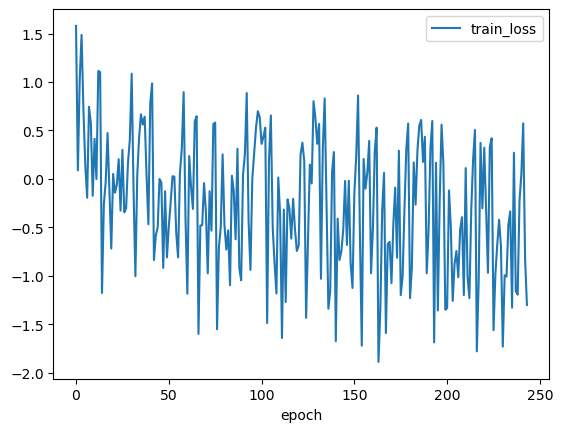

In [2]:
train_loss = df[['epoch', 'train_loss']].dropna()
train_loss.plot(x='epoch', y='train_loss')

<Axes: xlabel='epoch'>

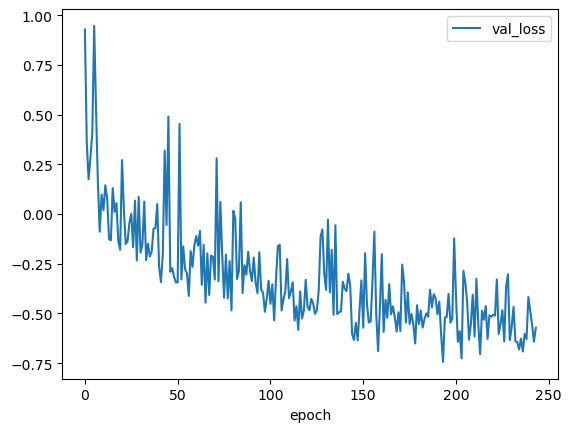

In [3]:
val_loss = df[['epoch', 'val_loss']].dropna()
val_loss.plot(x='epoch', y='val_loss')

In [10]:
import json
with open('/mnt/data/home/yxl/test/lagllama/pytorch-transformer-ts/' +
          'lag-llama/model-size-scaling-logs.orig_item_metrics/' +
          '0/experiments/lightning_logs/version_0/' +
          'm4_weekly.json', 'r') as f:
    metrics = json.load(f)

In [11]:
metrics

{'MSE': 1350393.1349936014,
 'abs_error': 2463584.469604492,
 'abs_target_sum': 25616889.502441406,
 'abs_target_mean': 5488.941397566189,
 'seasonal_error': 216.54813922503874,
 'MASE': 5.49596160657506,
 'MAPE': 0.11538058082657528,
 'sMAPE': 0.13132537617315207,
 'MSIS': 39.09753596904618,
 'QuantileLoss[0.1]': 1093640.75295105,
 'Coverage[0.1]': 0.03214056138847226,
 'QuantileLoss[0.2]': 1700201.7374481203,
 'Coverage[0.2]': 0.06792371973430468,
 'QuantileLoss[0.3]': 2101872.667430115,
 'Coverage[0.3]': 0.11013499035783159,
 'QuantileLoss[0.4]': 2341163.231085205,
 'Coverage[0.4]': 0.1673451896293122,
 'QuantileLoss[0.5]': 2463584.467033386,
 'Coverage[0.5]': 0.23762588386543823,
 'QuantileLoss[0.6]': 2492693.5588500975,
 'Coverage[0.6]': 0.30897793014784664,
 'QuantileLoss[0.7]': 2356245.8799423217,
 'Coverage[0.7]': 0.41525605313906155,
 'QuantileLoss[0.8]': 2027232.2152374268,
 'Coverage[0.8]': 0.5493893293336191,
 'QuantileLoss[0.9]': 1402790.3269805908,
 'Coverage[0.9]': 0.726

## scenario: PSML minute-pmu, case 0 for training, case 1 for testing


In [1]:
import pandas as pd
df = pd.read_csv('/mnt/data/home/yxl/test/lagllama/pytorch-transformer-ts/lag-llama/model-size-scaling-logs.psml_minute_pmu_4gpu/0/experiments/lightning_logs/version_0/metrics.csv')

<Axes: xlabel='epoch'>

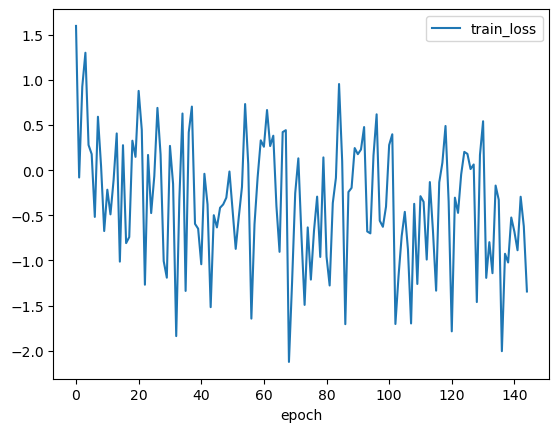

In [3]:
train_loss = df[['epoch', 'train_loss']].dropna()
train_loss.plot(x='epoch', y='train_loss')

<Axes: xlabel='epoch'>

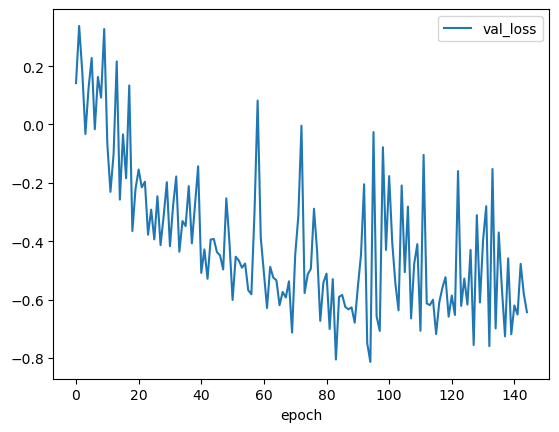

In [4]:
val_loss = df[['epoch', 'val_loss']].dropna()
val_loss.plot(x='epoch', y='val_loss')

In [9]:
import json
with open('/mnt/data/home/yxl/test/lagllama/pytorch-transformer-ts/lag-llama/model-size-scaling-logs.psml_minute_pmu_4gpu/0/experiments/lightning_logs/version_0/psml_pmu2_1min_Vm.json', 'r') as f:
    psml_case_2_metrics = json.load(f)

{'MSE': 0.00013843453933199838, 'abs_error': 67.26304298639297, 'abs_target_sum': 7924.276092529297, 'abs_target_mean': 0.9570381754262437, 'seasonal_error': 0.038057266355641, 'MASE': 0.21238079140854332, 'MAPE': 0.008644643380068663, 'sMAPE': 0.008741710778855378, 'MSIS': 1.5839699361967, 'QuantileLoss[0.1]': 35.86392358541489, 'Coverage[0.1]': 0.0, 'QuantileLoss[0.2]': 55.252649950981144, 'Coverage[0.2]': 0.0, 'QuantileLoss[0.3]': 66.28762917518614, 'Coverage[0.3]': 0.0037439613526570044, 'QuantileLoss[0.4]': 70.21156008243562, 'Coverage[0.4]': 0.02560386473429952, 'QuantileLoss[0.5]': 67.26304310560226, 'Coverage[0.5]': 0.08019323671497584, 'QuantileLoss[0.6]': 58.77800354957581, 'Coverage[0.6]': 0.1384057971014493, 'QuantileLoss[0.7]': 43.19426013231278, 'Coverage[0.7]': 0.31256038647342993, 'QuantileLoss[0.8]': 28.91780672073364, 'Coverage[0.8]': 0.6057971014492753, 'QuantileLoss[0.9]': 19.519919776916502, 'Coverage[0.9]': 0.8537439613526571, 'RMSE': 0.0117658208099562, 'NRMSE': 

In [8]:
psml_case_2_metrics

{'MSE': 0.00013843453933199838,
 'abs_error': 67.26304298639297,
 'abs_target_sum': 7924.276092529297,
 'abs_target_mean': 0.9570381754262437,
 'seasonal_error': 0.038057266355641,
 'MASE': 0.21238079140854332,
 'MAPE': 0.008644643380068663,
 'sMAPE': 0.008741710778855378,
 'MSIS': 1.5839699361967,
 'QuantileLoss[0.1]': 35.86392358541489,
 'Coverage[0.1]': 0.0,
 'QuantileLoss[0.2]': 55.252649950981144,
 'Coverage[0.2]': 0.0,
 'QuantileLoss[0.3]': 66.28762917518614,
 'Coverage[0.3]': 0.0037439613526570044,
 'QuantileLoss[0.4]': 70.21156008243562,
 'Coverage[0.4]': 0.02560386473429952,
 'QuantileLoss[0.5]': 67.26304310560226,
 'Coverage[0.5]': 0.08019323671497584,
 'QuantileLoss[0.6]': 58.77800354957581,
 'Coverage[0.6]': 0.1384057971014493,
 'QuantileLoss[0.7]': 43.19426013231278,
 'Coverage[0.7]': 0.31256038647342993,
 'QuantileLoss[0.8]': 28.91780672073364,
 'Coverage[0.8]': 0.6057971014492753,
 'QuantileLoss[0.9]': 19.519919776916502,
 'Coverage[0.9]': 0.8537439613526571,
 'RMSE': 0.

In [13]:
import json
with open('/mnt/data/home/yxl/test/lagllama/pytorch-transformer-ts/' +
          'lag-llama/model-size-scaling-logs.psml_minute_pmu_4gpu/' +
          '0/experiments/lightning_logs/version_0/' +
          'psml_pmu2_1min_Va.json', 'r') as f:
    metrics = json.load(f)

In [14]:
metrics

{'MSE': 1.0070364691627813e-05,
 'abs_error': 15.388404988541879,
 'abs_target_sum': 1015.3388400301337,
 'abs_target_mean': 0.12262546377175526,
 'seasonal_error': 0.012534190508965575,
 'MASE': 0.15533656702341395,
 'MAPE': 0.37829859376687447,
 'sMAPE': 0.12893038020167805,
 'MSIS': 1.8729586236007172,
 'QuantileLoss[0.1]': 12.94726325059137,
 'Coverage[0.1]': 0.02765700483091787,
 'QuantileLoss[0.2]': 16.330710860068212,
 'Coverage[0.2]': 0.033937198067632846,
 'QuantileLoss[0.3]': 17.47251478641905,
 'Coverage[0.3]': 0.05652173913043478,
 'QuantileLoss[0.4]': 17.05192685939261,
 'Coverage[0.4]': 0.09082125603864735,
 'QuantileLoss[0.5]': 15.388404949901796,
 'Coverage[0.5]': 0.18164251207729465,
 'QuantileLoss[0.6]': 13.36863793526273,
 'Coverage[0.6]': 0.29806763285024157,
 'QuantileLoss[0.7]': 10.377504576069715,
 'Coverage[0.7]': 0.4541062801932368,
 'QuantileLoss[0.8]': 6.940044159420813,
 'Coverage[0.8]': 0.6586956521739131,
 'QuantileLoss[0.9]': 4.828817549820723,
 'Coverage

In [15]:
df_metrics = pd.read_csv('/mnt/data/home/yxl/test/lagllama/pytorch-transformer-ts/' +
          'lag-llama/model-size-scaling-logs.psml_minute_pmu_4gpu/' +
          '0/experiments/lightning_logs/version_0/' +
          'psml_pmu2_1min_Vm_item_metrics.csv')

In [19]:
print(len(df_metrics))
df_metrics.head()

138


,Unnamed: 0,item_id,forecast_start,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,...,QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.6],Coverage[0.6],QuantileLoss[0.7],Coverage[0.7],QuantileLoss[0.8],Coverage[0.8],QuantileLoss[0.9],Coverage[0.9]
0,0,NaN,2019-02-25 13:20,0.000755,1.689007,53.054535,0.884242,0.050080,0.562105,0.031869,...,1.689007,0.0,1.405517,0.00,0.908837,0.350000,0.801836,0.566667,0.598846,0.683333
1,1,NaN,2019-02-25 14:20,0.000070,0.354939,52.118111,0.868635,0.050349,0.117492,0.006820,...,0.354939,0.0,0.286310,0.05,0.200596,0.300000,0.092255,0.650000,0.071338,1.000000
2,2,NaN,2019-02-25 15:20,0.000042,0.307428,52.505920,0.875099,0.050572,0.101317,0.005837,...,0.307428,0.0,0.260021,0.10,0.164213,0.366667,0.080466,0.733333,0.069324,1.000000
3,3,NaN,2019-02-25 16:20,0.000076,0.405050,53.331951,0.888866,0.050766,0.132979,0.007560,...,0.405050,0.0,0.399905,0.00,0.353086,0.033333,0.271390,0.383333,0.151150,0.666667
4,4,NaN,2019-02-25 17:20,0.000146,0.676660,54.888233,0.914804,0.050912,0.221515,0.012252,...,0.676660,0.0,0.661286,0.05,0.555897,0.166667,0.289521,0.250000,0.155084,0.783333


In [4]:
import json
with open('/mnt/data/home/yxl/test/lagllama/pytorch-transformer-ts/' +
          'lag-llama/model-size-scaling-logs.psml_w_usms/' +
          '0/experiments/lightning_logs/version_0/' +
          'psml_pmu2_1min_Vm.json', 'r') as f:
    metrics = json.load(f)
metrics

{'MSE': 5.366406789778302e-05,
 'abs_error': 31.714696764945984,
 'abs_target_sum': 7924.276092529297,
 'abs_target_mean': 0.9570381754262437,
 'seasonal_error': 0.038057266355641,
 'MASE': 0.1005013770254898,
 'MAPE': 0.004033689979149016,
 'sMAPE': 0.004036136839877232,
 'MSIS': 1.0239412369707304,
 'QuantileLoss[0.1]': 20.21778259277344,
 'Coverage[0.1]': 0.007487922705314009,
 'QuantileLoss[0.2]': 28.337417578697206,
 'Coverage[0.2]': 0.10144927536231885,
 'QuantileLoss[0.3]': 33.09549226760865,
 'Coverage[0.3]': 0.18381642512077295,
 'QuantileLoss[0.4]': 34.1039001941681,
 'Coverage[0.4]': 0.24371980676328503,
 'QuantileLoss[0.5]': 31.714696764945984,
 'Coverage[0.5]': 0.38780193236714977,
 'QuantileLoss[0.6]': 27.819579100608827,
 'Coverage[0.6]': 0.5485507246376812,
 'QuantileLoss[0.7]': 23.088853669166568,
 'Coverage[0.7]': 0.7176328502415459,
 'QuantileLoss[0.8]': 19.61737546920776,
 'Coverage[0.8]': 0.8809178743961352,
 'QuantileLoss[0.9]': 14.379471874237058,
 'Coverage[0.9]

In [5]:
import json
with open('/mnt/data/home/yxl/test/lagllama/pytorch-transformer-ts/' +
          'lag-llama/model-size-scaling-logs.psml_item_metrics_1GPU/' +
          '0/experiments/lightning_logs/version_0/' +
          'psml_pmu2_1min_Vm.json', 'r') as f:
    metrics = json.load(f)
metrics

{'MSE': 0.00015067755786212067,
 'abs_error': 65.28750139474869,
 'abs_target_sum': 7924.276092529297,
 'abs_target_mean': 0.9570381754262437,
 'seasonal_error': 0.038057266355641,
 'MASE': 0.20951603028633412,
 'MAPE': 0.008287940428787503,
 'sMAPE': 0.008306048776546449,
 'MSIS': 1.6341191532623907,
 'QuantileLoss[0.1]': 34.95377068519593,
 'Coverage[0.1]': 0.06219806763285023,
 'QuantileLoss[0.2]': 52.80881586074829,
 'Coverage[0.2]': 0.19963768115942027,
 'QuantileLoss[0.3]': 63.00063308477401,
 'Coverage[0.3]': 0.3207729468599034,
 'QuantileLoss[0.4]': 66.60761787891389,
 'Coverage[0.4]': 0.4301932367149759,
 'QuantileLoss[0.5]': 65.28750139474869,
 'Coverage[0.5]': 0.5509661835748793,
 'QuantileLoss[0.6]': 61.615715050697325,
 'Coverage[0.6]': 0.6856280193236716,
 'QuantileLoss[0.7]': 53.734547793865204,
 'Coverage[0.7]': 0.7725845410628019,
 'QuantileLoss[0.8]': 41.47360272407531,
 'Coverage[0.8]': 0.8696859903381643,
 'QuantileLoss[0.9]': 28.171295332908624,
 'Coverage[0.9]': 0

# PSML Millisecond PMU results

In [2]:
import pandas as pd
df = pd.read_csv('/mnt/data/home/yxl/test/lagllama/pytorch-transformer-ts/' +
          'lag-llama/model-size-scaling-logs.psml_milli_pmu_1GPU/' +
          '0/experiments/lightning_logs/version_0/' +
          'metrics.csv')

<Axes: xlabel='epoch'>

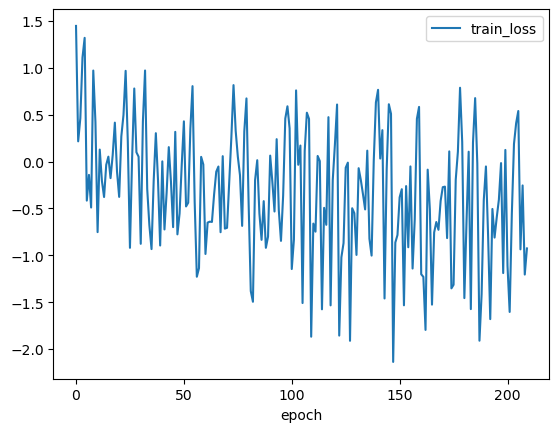

In [3]:
train_loss = df[['epoch', 'train_loss']].dropna()
train_loss.plot(x='epoch', y='train_loss')

<Axes: xlabel='epoch'>

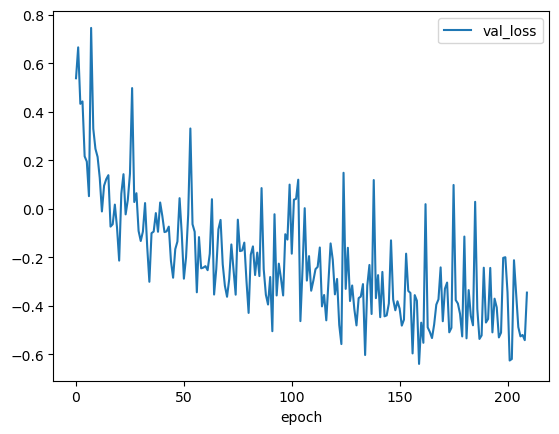

In [4]:
val_loss = df[['epoch', 'val_loss']].dropna()
val_loss.plot(x='epoch', y='val_loss')

In [ ]:
import json
with open('/mnt/data/home/yxl/test/lagllama/pytorch-transformer-ts/' +
          'lag-llama/model-size-scaling-logs.psml_milli_pmu_1GPU/' +
          '0/experiments/lightning_logs/version_0/' +
          'psml_pmu2_1min_Vm.json', 'r') as f:
    metrics = json.load(f)
metrics